In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for interactive dashboards
import plotly.express as px
from ipywidgets import widgets

In [2]:
data = pd.read_csv("2020_rws-updated.csv", encoding='latin1')
data.head()

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,...,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Preparing for work

In [11]:
'''
Creates and updates bar chart with each column name
'''
def update_bar_chart(column_name):
    # Calculate value counts and sort them
    value_count = data[column_name].value_counts().sort_values(ascending=False)
    str = column_name.split('-')
    if len(str) > 2: 
        col = str[2]
    elif len(str) > 1: 
        col = str[1]
    else: 
        col = str[0]
    fig = px.bar(x=value_count.index, y=value_count.values, labels={'x': column_name, 'y': 'Number of responses'})
    fig.update_layout(title=f'{col}')
    fig.show()
    fig.write_html('bar_chart.html', full_html=False, include_plotlyjs='cdn')

# Create a dropdown menu to select the column from columns in df
column_dropdown = widgets.Dropdown(
    options = data.columns,
    value = data.columns[0],
    description = 'Column:',
    disabled = False,
)

widgets.interactive(update_bar_chart, column_name=column_dropdown)

interactive(children=(Dropdown(description='Column:', options=('Response ID', 'What year were you born?', 'Wha…

0.3357664233576642

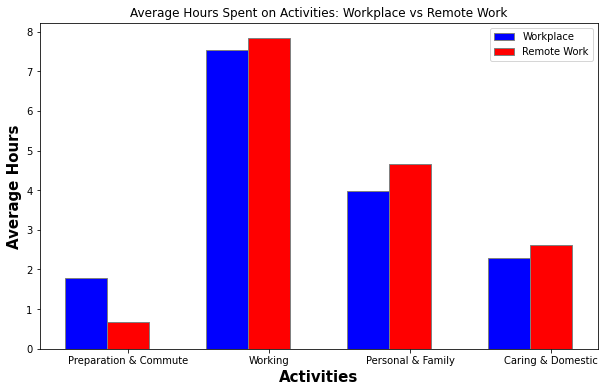

In [4]:
column_mapping = {
    "On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Preparing for work and commuting": "Workplace_Preparation_Commute",
    "On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Working": "Workplace_Working",
    "On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Personal and family time": "Workplace_Personal_Family",
    "On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Caring and domestic responsibilities": "Workplace_Caring_Domestic",
    "On a day when you do remote work, how many hours would you spend doing the following activities? - Preparing for work and commuting": "Remote_Preparation_Commute",
    "On a day when you do remote work, how many hours would you spend doing the following activities? - Working": "Remote_Working",
    "On a day when you do remote work, how many hours would you spend doing the following activities? - Personal and family time": "Remote_Personal_Family",
    "On a day when you do remote work, how many hours would you spend doing the following activities? - Caring and domestic responsibilities": "Remote_Caring_Domestic"
}

# Rename the columns as specified
selected_columns = data.rename(columns=column_mapping)

# Select only the renamed columns for processing
selected_columns = selected_columns[list(column_mapping.values())]

# Calculate the average hours spent on each activity
average_hours = selected_columns.mean()

# Separate the averages by workplace and remote work
average_hours_workplace = average_hours[['Workplace_Preparation_Commute', 'Workplace_Working', 'Workplace_Personal_Family', 'Workplace_Caring_Domestic']]
average_hours_remote = average_hours[['Remote_Preparation_Commute', 'Remote_Working', 'Remote_Personal_Family', 'Remote_Caring_Domestic']]

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Set position of bar on X axis
barWidth = 0.3
r1 = np.arange(len(average_hours_workplace))
r2 = [x + barWidth for x in r1]

# Make the plot
ax.bar(r1, average_hours_workplace, color='b', width=barWidth, edgecolor='grey', label='Workplace')
ax.bar(r2, average_hours_remote, color='r', width=barWidth, edgecolor='grey', label='Remote Work')

# Add labels and titles
plt.xlabel('Activities', fontweight='bold', fontsize=15)
plt.ylabel('Average Hours', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(average_hours_workplace))], ['Preparation & Commute', 'Working', 'Personal & Family', 'Caring & Domestic'])

# Create legend & Show graphic
plt.legend()
plt.title('Average Hours Spent on Activities: Workplace vs Remote Work')
plt.show()

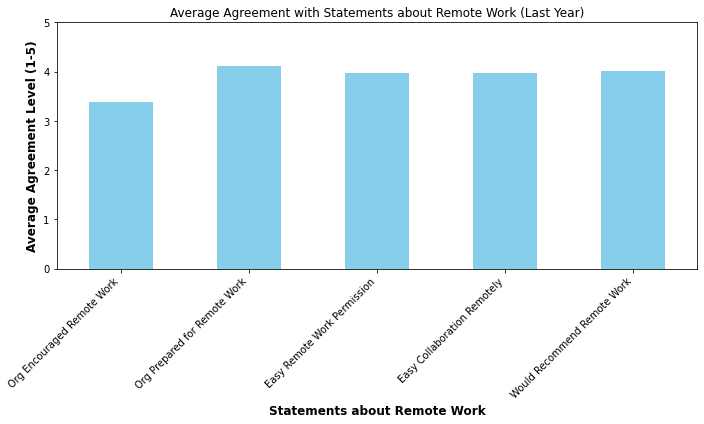

In [5]:
# Define short titles for the agreement statement columns
short_titles = {
    # Assuming these are the full column names from your dataset; you will need to replace them accordingly.
    'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely': 'Org Encouraged Remote Work',
    'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation was well prepared for me to work remotely': 'Org Prepared for Remote Work',
    'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - It was easy to get permission to work remotely': 'Easy Remote Work Permission',
    'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely': 'Easy Collaboration Remotely',
    'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others': 'Would Recommend Remote Work'
}

# Define a mapping for agreement levels to numerical values
agreement_mapping = {
    'Strongly disagree': 1,
    'Disagree': 2,
    'Neither agree nor disagree': 3,
    'Agree': 4,
    'Strongly agree': 5
}

# Find the actual column names from 'data' that match the descriptions in 'short_titles'
found_columns = {desc: None for desc in short_titles.keys()}
for col in data.columns:
    for desc in short_titles.keys():
        if desc in col:
            found_columns[desc] = col

# Apply the mapping to the agreement columns and calculate the averages
for long, short in short_titles.items():
    actual_column_name = found_columns[long]
    if actual_column_name:
        data[actual_column_name] = data[actual_column_name].map(agreement_mapping)

# Create a new DataFrame for the averages
average_agreement_df = pd.DataFrame({
    'Statement': short_titles.values(),
    'Average Agreement': [data[found_columns[long]].mean() for long in short_titles.keys()]
})

# Plot the graph with the shortened statement titles
fig, ax = plt.subplots(figsize=(10, 6))
average_agreement_df.plot(kind='bar', x='Statement', y='Average Agreement', ax=ax, legend=False, color='skyblue')

# Fine-tuning the graph appearance
plt.xticks(rotation=45, ha='right')
plt.xlabel('Statements about Remote Work', fontweight='bold', fontsize=12)
plt.ylabel('Average Agreement Level (1-5)', fontweight='bold', fontsize=12)
plt.title('Average Agreement with Statements about Remote Work (Last Year)')
plt.ylim(0, 5)

plt.tight_layout()
plt.show()